In [123]:
import tensorflow as tf
from tensorflow.keras import layers, utils, models
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [124]:
DATA_DIR = "./sig_images"

In [125]:
def load_data(DATA_DIR=DATA_DIR, test_size=0.3, verbose=True, load_grayscale=True):
    """
        Loads the data into a dataframe.
        
        Arguments:
            DATA_DIR: str
            test_size: float
        Returns:
            (x_train, y_train,x_test, y_test, x_val, y_val, df)
    """
    features = []
    features_forged = []
    features_real = []
    features_dict = {}
    labels = [] # forged: 0 and real:
    mode = "rgb"
    if load_grayscale:
        mode = "grayscale"
    
    for folder in os.listdir(DATA_DIR):
        # forged images
        for sub in os.listdir(DATA_DIR+"/forge"):
            if ".Jpeg" not in sub:
                continue
            f = DATA_DIR+"/forge/" + sub
            img = utils.load_img(f, color_mode=mode, target_size=(150,150))
            features.append(utils.img_to_array(img))
            features_dict[sub] = (img, 0)
            features_forged.append(img)
            labels.append(0) # forged

        # real images
        for sub in os.listdir(DATA_DIR+"/real"):
            if ".Jpeg" not in sub:
                continue
            f = DATA_DIR+"/real/" + sub
            print("sub: {}".format(sub))
            img = utils.load_img(f, color_mode=mode, target_size=(150,150))
            features.append(utils.img_to_array(img))
            features_dict[sub] = (img, 1)
            features_real.append(img)
            labels.append(1) # real
            
    features = np.array(features)
    labels = np.array(labels)
    
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=42)
    
    print ("Generated data.")
    return features, labels,features_forged, features_real,features_dict,X_train, X_test, y_train, y_test, X_val, y_val

features, labels, features_forged, features_real, features_dict, X_train, X_test, y_train, y_test, X_val, y_val = load_data(verbose=False, load_grayscale=False)

sub: 22T10.Jpeg
sub: 26T2.Jpeg
sub: 32T10.Jpeg
sub: 35T6.Jpeg
sub: 12T19.Jpeg
sub: 10T24.Jpeg
sub: 13T7.Jpeg
sub: 13T34.Jpeg
sub: 22T5.Jpeg
sub: 18T13.Jpeg
sub: 31T1.Jpeg
sub: 38T2.Jpeg
sub: 14T30.Jpeg
sub: 39T37.Jpeg
sub: 27T29.Jpeg
sub: 37T29.Jpeg
sub: 35T14.Jpeg
sub: 29T37.Jpeg
sub: 17T20.Jpeg
sub: 36T12.Jpeg
sub: 34T2.Jpeg
sub: 26T12.Jpeg
sub: 14T26.Jpeg
sub: 27T6.Jpeg
sub: 29T21.Jpeg
sub: 39T21.Jpeg
sub: 12T3.Jpeg
sub: 17T36.Jpeg
sub: 19T28.Jpeg
sub: 39T6.Jpeg
sub: 30T5.Jpeg
sub: 10T32.Jpeg
sub: 23T1.Jpeg
sub: 31T16.Jpeg
sub: 16T4.Jpeg
sub: 13T22.Jpeg
sub: 18T29.Jpeg
sub: 11T6.Jpeg
sub: 18T5.Jpeg
sub: 16T37.Jpeg
sub: 38T20.Jpeg
sub: 28T20.Jpeg
sub: 15T27.Jpeg
sub: 37T7.Jpeg
sub: 27T13.Jpeg
sub: 24T3.Jpeg
sub: 37T13.Jpeg
sub: 15T1.Jpeg
sub: 12T23.Jpeg
sub: 20T17.Jpeg
sub: 30T17.Jpeg
sub: 11T33.Jpeg
sub: 20T4.Jpeg
sub: 29T7.Jpeg
sub: 12T35.Jpeg
sub: 19T1.Jpeg
sub: 10T2.Jpeg
sub: 13T18.Jpeg
sub: 11T25.Jpeg
sub: 33T11.Jpeg
sub: 36T3.Jpeg
sub: 23T11.Jpeg
sub: 16T21.Jpeg
sub: 28T36.Jpeg

Distribution: [3252 3201]


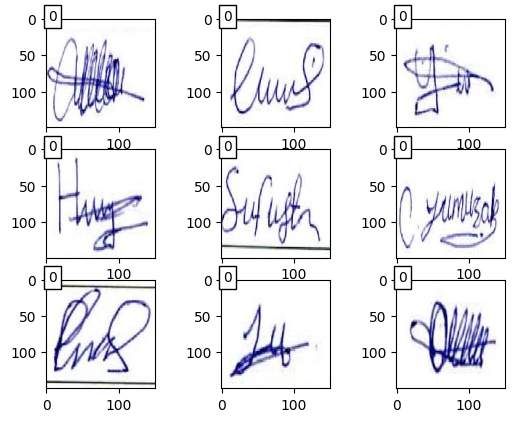

In [126]:
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(features[0]/255.)
axarr[0,0].text(2, 2, labels[0], bbox={'facecolor': 'white', 'pad': 3})
axarr[0,1].imshow(features[1]/255.)
axarr[0,1].text(2, 2, labels[1], bbox={'facecolor': 'white', 'pad': 3})
axarr[0,2].imshow(features[2]/255.)
axarr[0,2].text(2, 2, labels[2], bbox={'facecolor': 'white', 'pad': 3})
axarr[1,0].imshow(features[300]/255.)
axarr[1,0].text(2, 2, labels[300], bbox={'facecolor': 'white', 'pad': 3})
axarr[1,1].imshow(features[400]/255.)
axarr[1,1].text(2, 2, labels[400], bbox={'facecolor': 'white', 'pad': 3})
axarr[1,2].imshow(features[512]/255.)
axarr[1,2].text(2, 2, labels[512], bbox={'facecolor': 'white', 'pad': 3})
axarr[2,0].imshow(features[6]/255.)
axarr[2,0].text(2, 2, labels[6], bbox={'facecolor': 'white', 'pad': 3})
axarr[2,1].imshow(features[200]/255.)
axarr[2,1].text(2, 2, labels[200], bbox={'facecolor': 'white', 'pad': 3})
axarr[2,2].imshow(features[100]/255.)
axarr[2,2].text(2, 2, labels[100], bbox={'facecolor': 'white', 'pad': 3})

print ("Distribution: {}".format(np.bincount(labels)))

In [127]:
def label_to_text(label=0):
    return "Forged" if label == 0 else "Real"

A = features_dict["14T30.Jpeg"]
B = features_dict["14F30.Jpeg"]
print("A: {}, B: {}".format(label_to_text(A[1]), label_to_text(B[1])))

A: Real, B: Forged


In [128]:
def mse(y_true, y_pred):
    return np.square(np.subtract(y_true,y_pred)).mean()

A_array = utils.img_to_array(A[0])
B_array = utils.img_to_array(B[0])

print ("MSE Error: {}".format(mse(A_array, B_array)))

MSE Error: 5210.08642578125


### Use Sequential model:
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [129]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)
x = tf.ones((1, 4))
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6

Number of weights after calling the model: 6


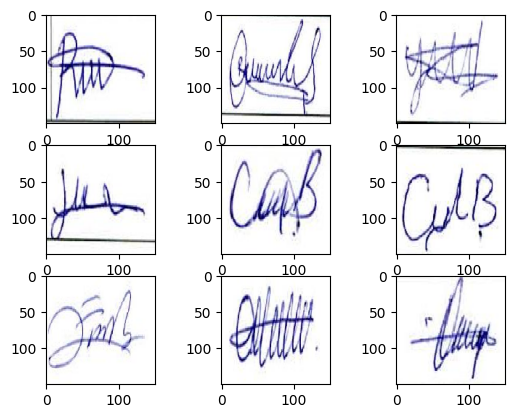

In [130]:
#divided by 255: Because the values in the dataset range from 0 to 255.
normalize_X_train = X_train / 255.
normalize_y_train = y_train / 255.

# visualizing 9 rndom digits from the dataset
for i in range(331, 340):
    plt.subplot(i)
    a = np.random.randint(0, normalize_X_train.shape[0], 1)
    plt.imshow(normalize_X_train[a[0]], cmap = plt.get_cmap('binary'))

plt.show()

### **Convolution Neutral Network** ref link:
* https://www.youtube.com/@CodingLane
* https://towardsdatascience.com/build-your-first-image-classifier-with-convolution-neural-network-cnn-b4e9034ec5cb

In [131]:
model = models.Sequential()
# how many layer should I use
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=2, strides=1, padding="valid"))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [132]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 147, 147, 32)     0         
 g2D)                                                            
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
